# Assignment 1

In this assignment, a dataset with monthly stock prices of Berkshire and Hathaway (BH), and index level of S&P 500(SP) is provided. The goal is to perform exploratory data analysis with python basic data structure and pandas and data pre-processing skill. 

The stock dataset includes price of BH and level of SP from Jan 2009 to Dec 2022. The attributes are: 

·     Date: The current date 

·     SP: The level of S&P 500 index. 

·     BH: The price of Berkshire and Hathaway’s A share. 

 

Complete the following tasks and answer the questions: 

<h1 style="color:purple">Group Members</h1>

- Student ID:  
- Name:                      


In [1]:
# Import the necessay packages for data analysis
# numpy is for data structure array and efficient scientific computation
import numpy as np
# pandas is for the data structure data.frame
import pandas as pd
# graphic packages
import matplotlib.pyplot as plt
# Stock simulator needed
import scipy.stats as sts

## Part I: Understand the example code. 

#### Example 1: import data (Please change the filename to your own filepath.)

In [2]:
# Import the data by pandas, set index_col = 0 so that the data column could be the index column. 
filename = 'SP_BH.csv'
data_df = pd.read_csv(filename,index_col=0)
data_df.index=pd.to_datetime(data_df.index)

In [3]:
data_df

,SP,BH
Date,,
2009-01-01,825.880005,89502
2009-02-01,735.090027,78600
2009-03-01,797.869995,86700
2009-04-01,872.809998,94000
2009-05-01,919.140015,91600
...,...,...
2022-08-01,3955.000000,421308
2022-09-01,3585.620117,406470
2022-10-01,3871.979980,445050


#### Example 2: Extract the level of SP from the data_df.

In [4]:
SP=data_df['SP']

In [5]:
SP

Date
2009-01-01     825.880005
2009-02-01     735.090027
2009-03-01     797.869995
2009-04-01     872.809998
2009-05-01     919.140015
                 ...     
2022-08-01    3955.000000
2022-09-01    3585.620117
2022-10-01    3871.979980
2022-11-01    4080.110107
2022-12-01    3839.500000
Name: SP, Length: 168, dtype: float64

#### Example 3: Generate a histogram and a line plot of the level of SP. 

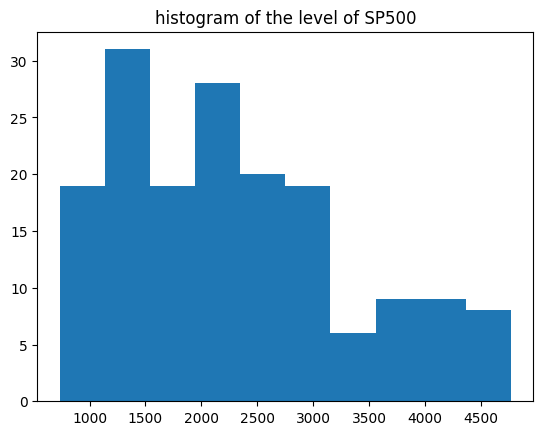

In [6]:
plt.hist(SP)
plt.title('histogram of the level of SP500')
plt.show()

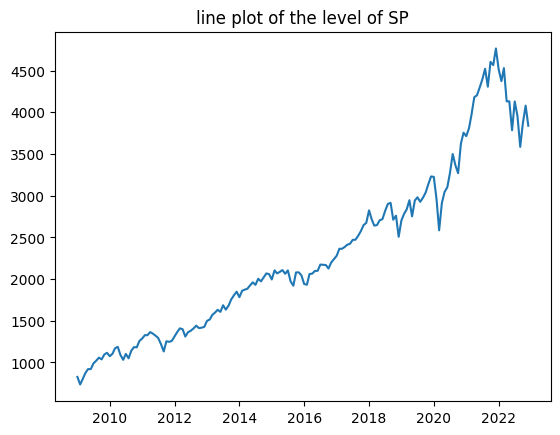

In [7]:
plt.plot(SP)
plt.title('line plot of the level of SP')
plt.show()

#### Example 4: Calculate the returns of SP500, i.e. (pricet – pricet-1)/pricet-1, name this dataframe as RSP. 

In [8]:
# pct_change function calculates percentage change by (x_t-x_(t-d))/x_(t-d) with parameter periods=d. 
# Here, to calculate monthly returns, set periods=1.
RSP=SP.pct_change(periods=1)
# drop first row which doesn't have a return
RSP=RSP.drop('2009-01-01')

In [9]:
RSP

Date
2009-02-01   -0.109931
2009-03-01    0.085404
2009-04-01    0.093925
2009-05-01    0.053081
2009-06-01    0.000196
                ...   
2022-08-01   -0.042440
2022-09-01   -0.093396
2022-10-01    0.079863
2022-11-01    0.053753
2022-12-01   -0.058971
Name: SP, Length: 167, dtype: float64

#### Example 5: Generate a histogram and a line plot of RSP. 

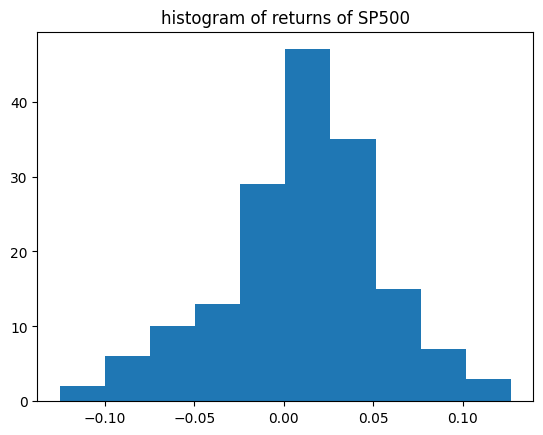

In [10]:
plt.hist(RSP)
plt.title('histogram of returns of SP500')
plt.show()

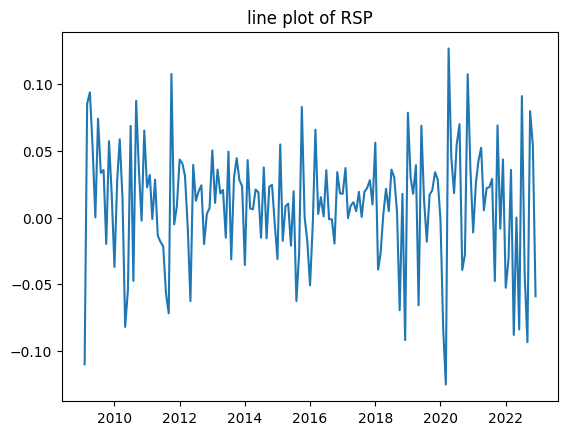

In [11]:
plt.plot(RSP)
plt.title('line plot of RSP')
plt.show()

#### Example 6: Calculate the sample mean and sample standard deviation of the RSP, and number of positive returns. 

In [12]:
sample_mean=RSP.mean()
sample_std=RSP.std()
num_positive_return=len(RSP[RSP>0])

In [13]:
sample_mean,sample_std,num_positive_return

(0.010213409553521692, 0.0440693638439818, 111)

## Part 2: Complete the tasks.

#### Task 1: Extract the prices of BH from the data_df.

In [17]:
BH = data_df['BH']
BH

Date
2009-01-01     89502
2009-02-01     78600
2009-03-01     86700
2009-04-01     94000
2009-05-01     91600
               ...  
2022-08-01    421308
2022-09-01    406470
2022-10-01    445050
2022-11-01    480280
2022-12-01    468711
Name: BH, Length: 168, dtype: int64

#### Task 2: Generate a line plot, and a histogram of BH.

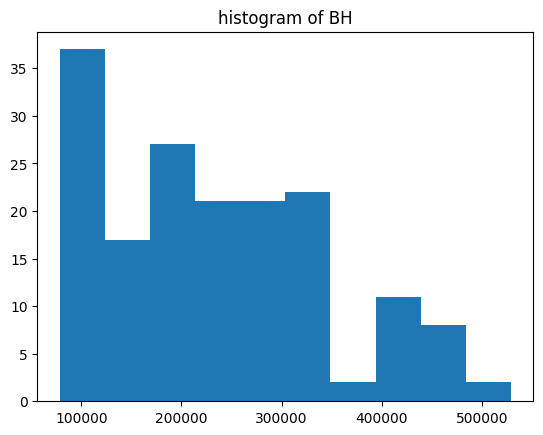

In [18]:
plt.hist(BH)
plt.title('histogram of BH')
plt.show()

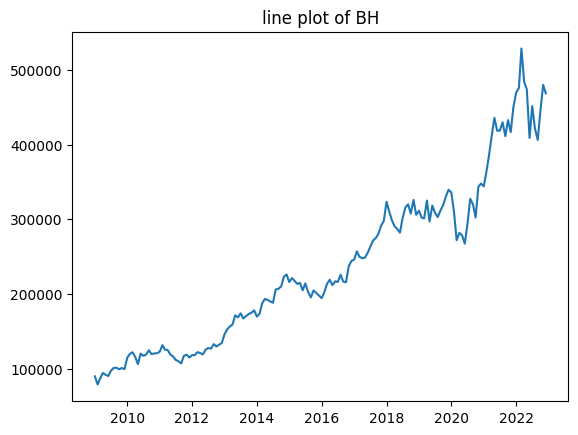

In [19]:
plt.plot(BH)
plt.title('line plot of BH')
plt.show()

#### Task 3: Calculate the returns of BH with method in Example 4 and name the dataframe as RBH. 

In [20]:
RBH=BH.pct_change(periods=1)
RBH=RBH.drop('2009-01-01')
RBH

Date
2009-02-01   -0.121807
2009-03-01    0.103053
2009-04-01    0.084198
2009-05-01   -0.025532
2009-06-01   -0.017467
                ...   
2022-08-01   -0.067284
2022-09-01   -0.035219
2022-10-01    0.094915
2022-11-01    0.079160
2022-12-01   -0.024088
Name: BH, Length: 167, dtype: float64

#### Task 4: Generate a line plot, and a histogram of RBH. 

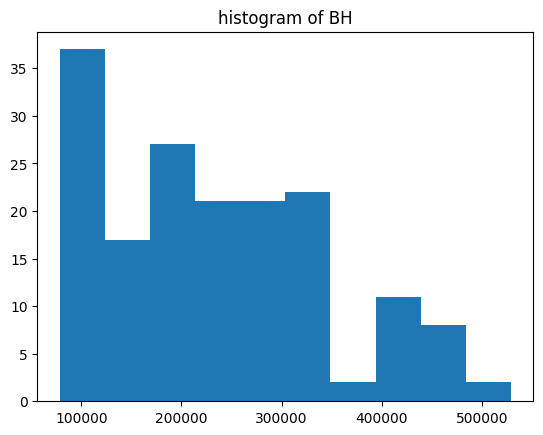

In [21]:
plt.hist(BH)
plt.title('histogram of BH')
plt.show()

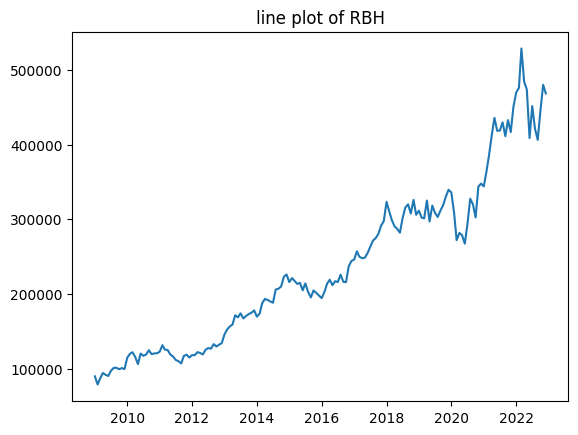

In [22]:
plt.plot(BH)
plt.title('line plot of RBH')
plt.show()

#### Task 5: Calculate the sample mean and sample standard deviation of the RBH, and number of negative returns. 

In [24]:
sample_mean_rbh=RBH.mean()
sample_std_rbh=RBH.std()
num_negative_return_rbh=len(RBH[RBH>0])

In [25]:
sample_mean_rbh,sample_std_rbh,num_negative_return_rbh

(0.011222739842378818, 0.05060526410495768, 96)

#### Task 6: Generate a scatter plot with RSP as x-axis and RBH as y-axis, calculate their level of correlation. Interpret the level of correlation.  

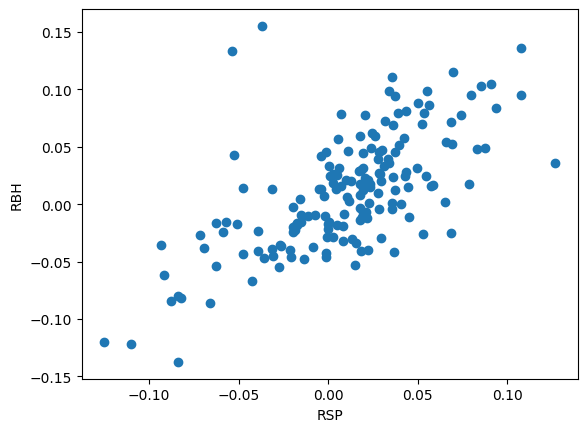

In [27]:
plt.scatter(RSP, RBH)
plt.xlabel('RSP')
plt.ylabel('RBH')
plt.show()

In [35]:
correlation=RSP.corr(RBH)
correlation

0.6622905110618889

#### Interpretaion of the level of correlation

Given that the value of rbh increases linearly with the value of rsp, and the correlation coefficient approaches 0.7, the two data can be said to be linear.